*Problem Statement*:

    Implement the Image classification CNN model for classifying hand-written MNIST dataset by dividing the model into following 4 stages:
    a.	Loading and preprocessing the image data
    b.	Defining the model's architecture
    c.	Training the model
    d.	Estimating the model's performance


## a.	Loading and preprocessing the image data


In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

ModuleNotFoundError: No module named 'tensorflow'

8


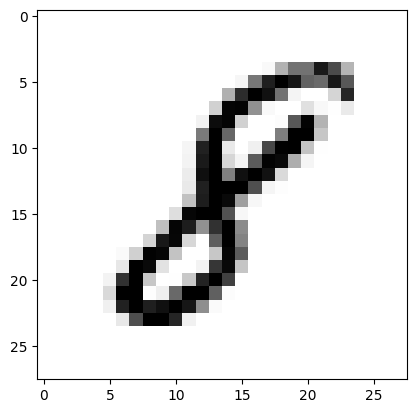

In [2]:
import matplotlib.pyplot as plt

image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

60,000 training images and 10,000 testing images

In [3]:
x_train.shape

(60000, 28, 28)

### Reshaping and Normalizing the Images

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## b.	Defining the model's architecture


### Building the Convolutional Neural Network

In [5]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

## c.	Training the model

In [6]:
batch_size = 512
epochs = 10

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 19s 143ms/step - loss: 0.4297 - accuracy: 0.8777
Epoch 2/10
118/118 [==============================] - 15s 125ms/step - loss: 0.1757 - accuracy: 0.9481
Epoch 3/10
118/118 [==============================] - 15s 131ms/step - loss: 0.1221 - accuracy: 0.9640
Epoch 4/10
118/118 [==============================] - 15s 127ms/step - loss: 0.0958 - accuracy: 0.9706
Epoch 5/10
118/118 [==============================] - 15s 123ms/step - loss: 0.0740 - accuracy: 0.9783
Epoch 6/10
118/118 [==============================] - 15s 127ms/step - loss: 0.0635 - accuracy: 0.9808
Epoch 7/10
118/118 [==============================] - 15s 123ms/step - loss: 0.0526 - accuracy: 0.9839
Epoch 8/10
118/118 [==============================] - 15s 126ms/step - loss: 0.0463 - accuracy: 0.9861
Epoch 9/10
118/118 [==============================] - 15s 129ms/step - loss: 0.0400 - accuracy: 0.9881
Epoch 10/10
118/118 [==============================] - 15s 127ms/step - l

## d.	Estimating the model's performance

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 3s 9ms/step - loss: 0.0507 - accuracy: 0.9843
Test Loss: 0.05069926008582115, Test Accuracy: 0.9843000173568726


In [8]:
# list all data in history
print(history.history.keys())


dict_keys(['loss', 'accuracy'])


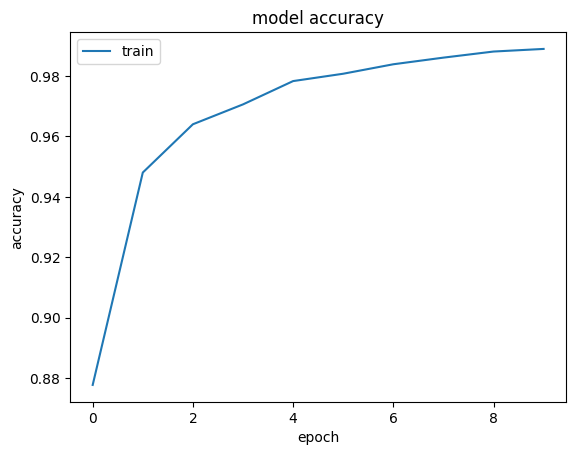

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


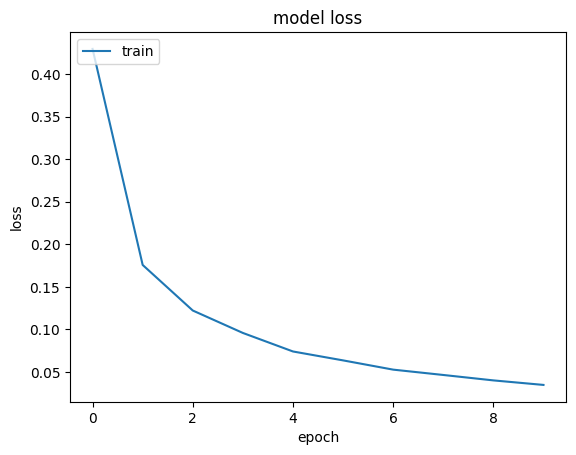

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Checking individual prediction

1/1 [==============================] - 1s 521ms/step
9


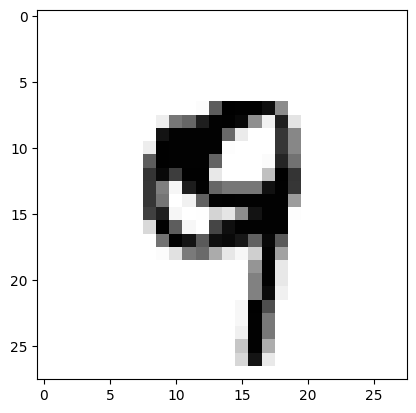

In [11]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())